In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('hourly data(2000-2023).csv')

In [6]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [8]:
import datetime

def estimate_power_consumption(date):
    hour = date.hour
    month = date.month

    if month in [12, 1, 2]:  
        base_demand = np.random.uniform(4500, 5500)/24  
    elif month in [5, 6, 7]: 
        base_demand = np.random.uniform(7000, 8000)/24  
    else:
        base_demand = np.random.uniform(5500, 6500)/24 

   
    if 6 <= hour <= 10:
        base_demand *= 1.3  
    elif 12 <= hour <= 15:  
        base_demand *= 0.8  
    elif 18 <= hour <= 22:  
        base_demand *= 1.5 
    else:
        base_demand *= 1.0  

    return base_demand




df['electricity_demand'] = df['timestamp'].apply(estimate_power_consumption)


df.head()


,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand
0,2000-01-01 00:00:00,5,0,1,17.483571,0,0.853473,228.680708
1,2000-01-01 01:00:00,5,1,1,14.308678,0,4.869377,211.508737
2,2000-01-01 02:00:00,5,2,1,18.238443,0,4.997991,212.176946
3,2000-01-01 03:00:00,5,3,1,22.615149,0,2.738188,226.075555
4,2000-01-01 04:00:00,5,4,1,13.829233,0,7.694527,196.653592


In [9]:
df.tail(8737)

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand
201624,2023-01-01 00:00:00,6,0,1,14.228017,0,6.453321,216.366184
201625,2023-01-01 01:00:00,6,1,1,14.656401,0,3.729741,187.757574
201626,2023-01-01 02:00:00,6,2,1,6.770540,0,9.156252,227.316523
201627,2023-01-01 03:00:00,6,3,1,11.474267,0,2.773539,202.980678
201628,2023-01-01 04:00:00,6,4,1,9.821519,0,3.432423,199.389590
...,...,...,...,...,...,...,...,...
210356,2023-12-30 20:00:00,5,20,1,10.287488,0,6.321843,286.775127
210357,2023-12-30 21:00:00,5,21,1,13.728469,0,4.988534,282.076934
210358,2023-12-30 22:00:00,5,22,1,12.069605,0,7.831031,287.757981
210359,2023-12-30 23:00:00,5,23,1,15.542929,0,2.843539,210.790750


In [10]:
def assign_compensation_method(row):
    if row['is_holiday'] == 1:
        return 'Lower Power Supply'
    elif row['solar_generation'] > 200:
        return 'Increased Renewable Energy Integration'
    elif row['hour_of_day'] >= 18 and row['hour_of_day'] <= 22:
        return 'Peak Load Shifting'
    elif row['temperature'] > 35:
        return 'Increased Power Supply'
    else:
        return 'Normal Operation'

df['compensation_method'] = df.apply(assign_compensation_method, axis=1)

print(df[['timestamp', 'electricity_demand', 'compensation_method']].head(10))


            timestamp  electricity_demand  \
0 2000-01-01 00:00:00          228.680708   
1 2000-01-01 01:00:00          211.508737   
2 2000-01-01 02:00:00          212.176946   
3 2000-01-01 03:00:00          226.075555   
4 2000-01-01 04:00:00          196.653592   
5 2000-01-01 05:00:00          202.236226   
6 2000-01-01 06:00:00          273.317506   
7 2000-01-01 07:00:00          259.666659   
8 2000-01-01 08:00:00          293.533103   
9 2000-01-01 09:00:00          253.734887   

                      compensation_method  
0                        Normal Operation  
1                        Normal Operation  
2                        Normal Operation  
3                        Normal Operation  
4                        Normal Operation  
5                        Normal Operation  
6                        Normal Operation  
7                        Normal Operation  
8  Increased Renewable Energy Integration  
9                        Normal Operation  


In [11]:
df

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand,compensation_method
0,2000-01-01 00:00:00,5,0,1,17.483571,0,0.853473,228.680708,Normal Operation
1,2000-01-01 01:00:00,5,1,1,14.308678,0,4.869377,211.508737,Normal Operation
2,2000-01-01 02:00:00,5,2,1,18.238443,0,4.997991,212.176946,Normal Operation
3,2000-01-01 03:00:00,5,3,1,22.615149,0,2.738188,226.075555,Normal Operation
4,2000-01-01 04:00:00,5,4,1,13.829233,0,7.694527,196.653592,Normal Operation
...,...,...,...,...,...,...,...,...,...
210356,2023-12-30 20:00:00,5,20,1,10.287488,0,6.321843,286.775127,Peak Load Shifting
210357,2023-12-30 21:00:00,5,21,1,13.728469,0,4.988534,282.076934,Peak Load Shifting
210358,2023-12-30 22:00:00,5,22,1,12.069605,0,7.831031,287.757981,Peak Load Shifting
210359,2023-12-30 23:00:00,5,23,1,15.542929,0,2.843539,210.790750,Normal Operation


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
X = df[['temperature', 'solar_generation', 'hour_of_day', 'electricity_demand', 'is_holiday']]
y=df['compensation_method']
X_reg = df[['temperature', 'solar_generation', 'hour_of_day', 'is_holiday']]
y_reg = df['electricity_demand']
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

In [16]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_clf=RandomForestClassifier(n_estimators=100, random_state=42)

In [17]:
rf_reg.fit(X_reg_train, y_reg_train)

RandomForestRegressor(random_state=42)

In [18]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = rf_clf.predict(X_test)
class_accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Model Accuracy: {class_accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Make predictions on the test set for regression (peak supply)
y_reg_pred = rf_reg.predict(X_reg_test)
reg_mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Regression Model Mean Squared Error: {reg_mse:.2f}")
print(confusion_matrix(y_test, y_pred))

Classification Model Accuracy: 1.00
                                        precision    recall  f1-score   support

                Increased Power Supply       1.00      1.00      1.00      4576
Increased Renewable Energy Integration       1.00      1.00      1.00     13704
                    Lower Power Supply       1.00      0.95      0.97        20
                      Normal Operation       1.00      1.00      1.00     32711
                    Peak Load Shifting       1.00      1.00      1.00     12098

                              accuracy                           1.00     63109
                             macro avg       1.00      0.99      0.99     63109
                          weighted avg       1.00      1.00      1.00     63109

Regression Model Mean Squared Error: 1464.09
[[ 4576     0     0     0     0]
 [    0 13704     0     0     0]
 [    1     0    19     0     0]
 [    0     0     0 32711     0]
 [    0     0     0     0 12098]]


In [20]:
def predict_for_date(date, temperature, solar_generation, hour_of_day, is_holiday, rf_clf, rf_reg, le):
    new_data_class = pd.DataFrame({
        'temperature': [temperature],
        'solar_generation': [solar_generation],
        'hour_of_day': [hour_of_day],
        'electricity_demand': [0],
        'is_holiday': [is_holiday]
    })

    new_data_reg = pd.DataFrame({
        'temperature': [temperature],
        'solar_generation': [solar_generation],
        'hour_of_day': [hour_of_day],
        'is_holiday': [is_holiday]
    })
    
    predicted_class_label = rf_clf.predict(new_data_class)
    predicted_compensation_method = le.inverse_transform(predicted_class_label)
    predicted_peak_supply = rf_reg.predict(new_data_reg)

    return {
        'date': date,
        'hour_of_day': hour_of_day,
        'compensation_method': predicted_compensation_method[0],
        'peak_supply_needed': predicted_peak_supply[0]
    }

def generate_24_hour_predictions(timestamp, temperature, solar_generation, is_holiday, rf_clf, rf_reg, le):

    results = []

    hour=timestamp.hour
    
    prediction = predict_for_date(timestamp, temperature, solar_generation, hour, is_holiday, rf_clf, rf_reg, le)
    results.append(prediction)
    
    df_predictions = pd.DataFrame(results)
    
    return df_predictions


In [21]:
testdf=pd.read_csv('2025 testset.csv')

In [22]:
testdf.drop('electricity_demand', axis=1, inplace=True)

In [23]:
testdf['timestamp']=pd.to_datetime(testdf['timestamp'])

In [24]:
def generate_year_predictions(test_dataset, rf_clf, rf_reg, le):
    
    all_predictions = []

    for _, row in test_dataset.iterrows():
        timestamp = pd.to_datetime(row['timestamp'])
        temperature = row['temperature']
        solar_generation = row['solar_generation']
        is_holiday = row['is_holiday']

        # Generate predictions for each hour of the day
        daily_predictions = generate_24_hour_predictions(timestamp, temperature, solar_generation, is_holiday, rf_clf, rf_reg, le)
        all_predictions.append(daily_predictions)
    
    # Combine all daily predictions into one DataFrame
    df_all_predictions = pd.concat(all_predictions, ignore_index=True)
    
    return df_all_predictions


In [25]:
def generate_year_predictions(test_dataset, rf_clf, rf_reg, le):
    
    all_predictions = []

    for _, row in test_dataset.iterrows():
        timestamp = pd.to_datetime(row['timestamp'])
        temperature = row['temperature']
        solar_generation = row['solar_generation']
        is_holiday = row['is_holiday']

        # Generate predictions for each hour of the day
        daily_predictions = generate_24_hour_predictions(timestamp, temperature, solar_generation, is_holiday, rf_clf, rf_reg, le)
        all_predictions.append(daily_predictions)
    
    # Combine all daily predictions into one DataFrame
    df_all_predictions = pd.concat(all_predictions, ignore_index=True)
    
    return df_all_predictions


In [26]:
df_year_predictions = generate_year_predictions(testdf, rf_clf, rf_reg, le)

df_year_predictions

,date,hour_of_day,compensation_method,peak_supply_needed
0,2025-01-01 00:00:00,0,Normal Operation,264.410095
1,2025-01-01 01:00:00,1,Normal Operation,211.774643
2,2025-01-01 02:00:00,2,Normal Operation,210.984197
3,2025-01-01 03:00:00,3,Normal Operation,212.106196
4,2025-01-01 04:00:00,4,Normal Operation,221.365517
...,...,...,...,...
8732,2025-12-30 20:00:00,20,Normal Operation,316.714802
8733,2025-12-30 21:00:00,21,Normal Operation,305.584896
8734,2025-12-30 22:00:00,22,Normal Operation,325.126220
8735,2025-12-30 23:00:00,23,Normal Operation,207.523038


C:\Users\ASUS\AppData\Local\Temp\ipykernel_38096\3694581382.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df.head(8760), x='hour_of_day', y='electricity_demand', palette='Set1')


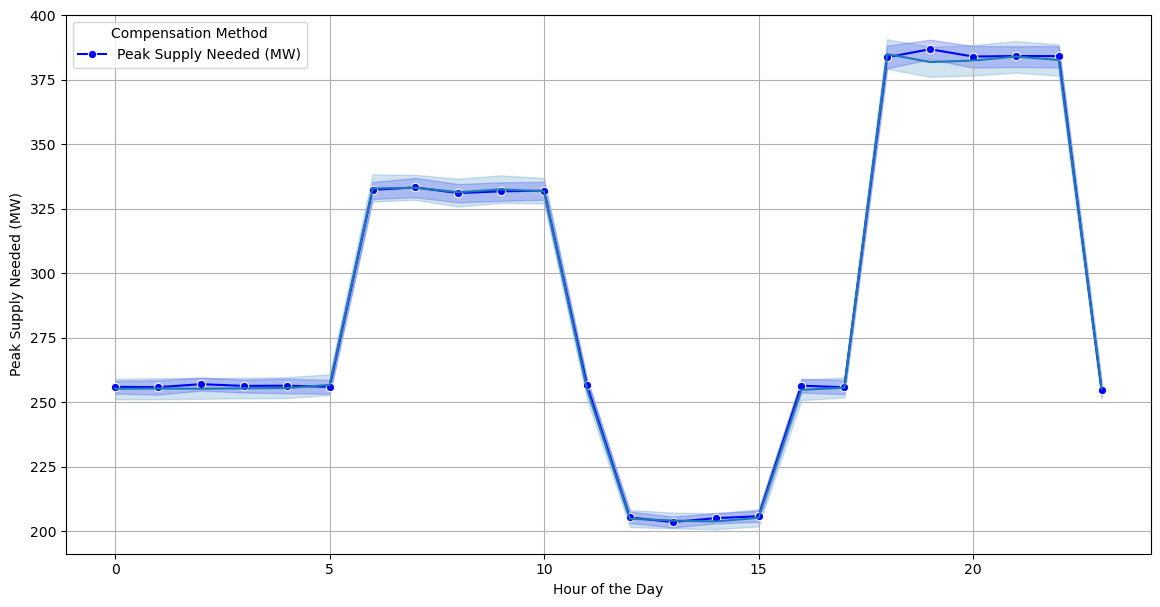

In [27]:
def plot_predictions(df_predictions):
    plt.figure(figsize=(14, 7))

    sns.lineplot(data=df_year_predictions, x='hour_of_day', y='peak_supply_needed', marker='o', color='blue', label='Peak Supply Needed (MW)')
    
    sns.lineplot(data=df.head(8760), x='hour_of_day', y='electricity_demand', palette='Set1')

    # plt.title('Hourly Predictions for {}'.format(df_predictions['date'][0]))
    plt.xlabel('Hour of the Day')
    plt.ylabel('Peak Supply Needed (MW)')
    plt.legend(title='Compensation Method')
    plt.grid(True)
    plt.show()

plot_predictions(df_year_predictions)

In [117]:
testdf['old_compensation']=df_year_predictions['compensation_method']

In [118]:
df_year_predictions['date']=pd.to_datetime(df_year_predictions['date'])

In [127]:
df_year_predictions

,date,hour_of_day,compensation_method,peak_supply_needed
0,2025-01-01 00:00:00,0,Normal Operation,513.437898
1,2025-01-01 01:00:00,1,Normal Operation,566.474571
2,2025-01-01 02:00:00,2,Normal Operation,513.521440
3,2025-01-01 03:00:00,3,Normal Operation,506.503517
4,2025-01-01 04:00:00,4,Normal Operation,551.241545
...,...,...,...,...
8732,2025-12-30 20:00:00,20,Peak Load Shifting,615.414558
8733,2025-12-30 21:00:00,21,Peak Load Shifting,624.330753
8734,2025-12-30 22:00:00,22,Peak Load Shifting,660.092769
8735,2025-12-30 23:00:00,23,Normal Operation,483.432154


In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [134]:
temp=df['electricity_demand'].head(8737)
temp

0       512.319382
1       439.055673
2       539.090652
3       523.248968
4       516.822822
           ...    
8732    608.922194
8733    603.235735
8734    646.080153
8735    514.032967
8736    564.172473
Name: electricity_demand, Length: 8737, dtype: float64

In [135]:
predicted_loads = df_year_predictions['peak_supply_needed']
actual_loads = temp

In [136]:
mae = mean_absolute_error(actual_loads, predicted_loads)
mse = mean_squared_error(actual_loads, predicted_loads)
rmse = np.sqrt(mse)
r2 = r2_score(actual_loads, predicted_loads)
mape = np.mean(np.abs((actual_loads - predicted_loads) / actual_loads)) * 100
accuracy = 100 - mape

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print(f"Accuracy: {accuracy:.4f}%")

Mean Absolute Error (MAE): 52.1100
Mean Squared Error (MSE): 4369.5996
Root Mean Squared Error (RMSE): 66.1029
R-squared (R²): 0.4659
Mean Absolute Percentage Error (MAPE): 10.4934%
Accuracy: 89.5066%
